In [15]:
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [3]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

In [4]:
# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#After i had the unique countries that did not get merged i checked the CSV file to see why.
#If it was in the CSV file but with a different name i updated the name in the CSV file to match our dataframe
#If the country was not in the CSV file i added the data by adding its name and appropriate region that matches the CSV (Laos and Palestinian Territories)

#Print len of list that contains valued not merged to make sure that no conutries from clean data set were left out and that they all received a region
print(len(not_in_list))

#print the len of your merged data and orginal dataframe to make sure they match just for good measures and all orginal data is represented
print(len(merged_renamed), len(clean_data))

0
427 427


In [5]:
merged_renamed.loc[merged_renamed["Country Name"] == "United States"]

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
403,United States,2017,6.991759,10.905420,0.921003,68.400002,0.868497,0.194489,0.681191,0.826555,0.692602,1.552104,1.880688,0.268986,North America
404,United States,2018,6.882685,10.927395,0.903856,68.300003,0.824607,0.113378,0.709928,0.815383,0.758395,1.482865,2.119374,0.307928,North America
405,United States,2019,6.943701,10.944225,0.916691,68.199997,0.836139,0.141645,0.706716,0.814985,NaN,NaN,1.789670,0.257740,North America


#### Filter data set to only include countries that have data for all 3 years

In [6]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

# Print the lenght of the countries with all 3 years and original data frame to see how many we are losing
print(len(countries))
print(len(loop_df["Country Name"].unique()))

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#Check to see if lenght matches length of countries lists
Final_df["Country Name"].nunique()


129
153


129

#### Final Data sets

In [7]:
#Gini Data set 
gini_index
gini_index_2010
gini_index_2015

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Turkey,2015,5.514465,10.056709,0.851225,65.599998,0.653197,-0.017012,0.806076,0.460246,-0.930817,0.056615,2.530940,0.458964,0.429,Europe & Central Asia
628,Ukraine,2015,3.964543,8.917973,0.909440,63.700001,0.430592,-0.011267,0.952473,0.574076,-1.024300,-0.727938,1.956619,0.493530,0.255,Europe & Central Asia
638,United Kingdom,2015,6.515445,10.571567,0.935986,71.699997,0.832926,0.300925,0.456134,0.797785,0.907792,1.819708,1.753815,0.269178,0.332,Europe & Central Asia
651,Uruguay,2015,6.628080,9.900736,0.891493,68.699997,0.916880,-0.038354,0.673476,0.892661,1.073821,0.745666,2.191727,0.330673,0.402,Latin America & Caribbean


In [8]:
#Data set with the countries that have data for all 3 years 
Final_df

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
0,Afghanistan,2017,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,-1.896539,-1.440218,1.454051,0.546283,South Asia
1,Afghanistan,2018,2.694303,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,-1.870725,-1.438761,1.408344,0.522712,South Asia
2,Afghanistan,2019,2.375092,7.458469,0.419973,52.400002,0.393656,-0.096549,0.923849,0.351387,NaN,NaN,1.412905,0.594884,South Asia
3,Albania,2017,4.639548,9.376133,0.637698,68.400002,0.749611,-0.029357,0.876135,0.669241,0.290326,-0.128311,2.682105,0.578096,Europe & Central Asia
4,Albania,2018,5.004403,9.417863,0.683592,68.699997,0.824212,0.008337,0.899129,0.713300,0.294235,-0.129403,2.640531,0.527642,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Zambia,2018,4.041488,8.228971,0.717720,55.299999,0.790626,0.037525,0.810731,0.702698,-0.089234,-0.500724,2.783419,0.688711,Sub-Saharan Africa
383,Zambia,2019,3.306797,8.224403,0.637894,55.799999,0.811040,0.066340,0.831956,0.743407,NaN,NaN,2.860172,0.864937,Sub-Saharan Africa
384,Zimbabwe,2017,3.638300,7.851042,0.754147,55.000000,0.752826,-0.091540,0.751208,0.806428,-0.952548,-1.350873,2.656848,0.730244,Sub-Saharan Africa
385,Zimbabwe,2018,3.616480,7.896704,0.775388,55.599998,0.762675,-0.063282,0.844209,0.710119,-0.920905,-1.323000,2.498696,0.690919,Sub-Saharan Africa


In [9]:
Final_df["Country Name"].nunique()

129

In [11]:
gini_index_2015

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Turkey,2015,5.514465,10.056709,0.851225,65.599998,0.653197,-0.017012,0.806076,0.460246,-0.930817,0.056615,2.530940,0.458964,0.429,Europe & Central Asia
628,Ukraine,2015,3.964543,8.917973,0.909440,63.700001,0.430592,-0.011267,0.952473,0.574076,-1.024300,-0.727938,1.956619,0.493530,0.255,Europe & Central Asia
638,United Kingdom,2015,6.515445,10.571567,0.935986,71.699997,0.832926,0.300925,0.456134,0.797785,0.907792,1.819708,1.753815,0.269178,0.332,Europe & Central Asia
651,Uruguay,2015,6.628080,9.900736,0.891493,68.699997,0.916880,-0.038354,0.673476,0.892661,1.073821,0.745666,2.191727,0.330673,0.402,Latin America & Caribbean


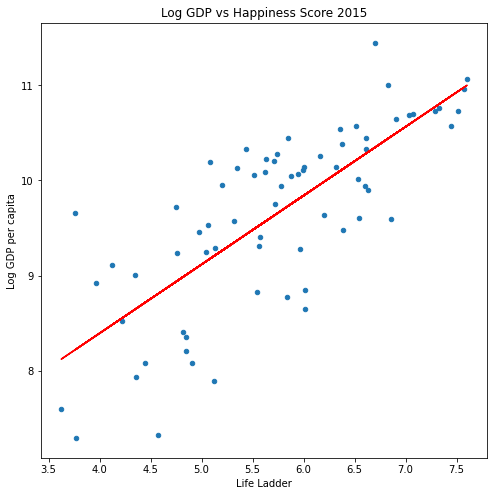

0.7619276931775727


In [19]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="Life Ladder", y="Log GDP per capita", grid=False, figsize=(8,8),
              title="Log GDP vs Happiness Score 2015")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gdp = gini_index_2015.iloc[:, 3]
correlation = st.pearsonr(happiness, gdp)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness, gdp)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

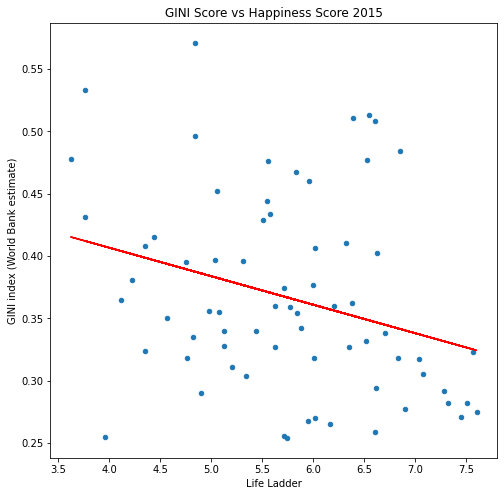

-0.2917016957676174


In [18]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="Life Ladder", y="GINI index (World Bank estimate)", grid=False, figsize=(8,8),
              title="GINI Score vs Happiness Score 2015")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gini = gini_index_2015.iloc[:, 14]
correlation = st.pearsonr(happiness, gini)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness, gini)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

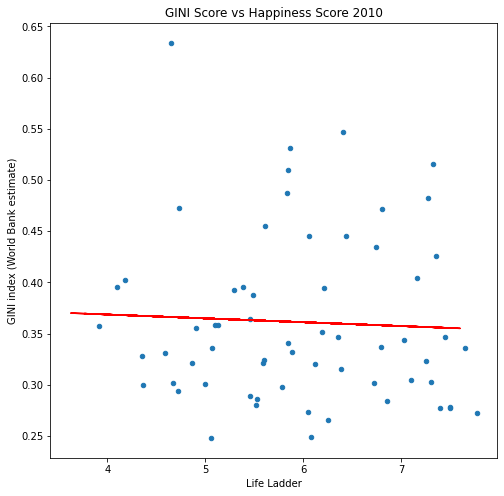

-0.04677084192343674


In [20]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2010.plot(kind="scatter", x="Life Ladder", y="GINI index (World Bank estimate)", grid=False, figsize=(8,8),
              title="GINI Score vs Happiness Score 2010")

#Calculate the correlation coefficient
happiness_2010 = gini_index_2010.iloc[:, 2]
gini_2010 = gini_index_2010.iloc[:, 14]
correlation = st.pearsonr(happiness_2010, gini_2010)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness_2010, gini_2010)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

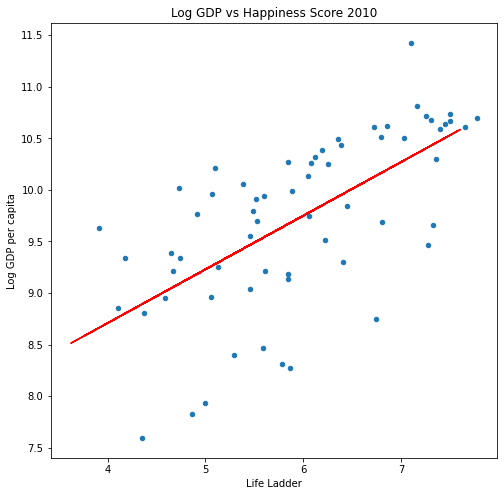

0.641714441805099


In [21]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2010.plot(kind="scatter", x="Life Ladder", y="Log GDP per capita", grid=False, figsize=(8,8),
              title="Log GDP vs Happiness Score 2010")

#Calculate the correlation coefficient
happiness_2010 = gini_index_2010.iloc[:, 2]
gdp_2010 = gini_index_2010.iloc[:, 3]
correlation = st.pearsonr(happiness_2010, gdp_2010)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness_2010, gdp_2010)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

In [23]:
gini_data = pd.read_csv("API_SI.POV.GINI_DS2_en_csv_v2_1993647.csv")
gini_data

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,12/16/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
4,Aruba,ABW,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Kosovo,XKX,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,27.8,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN
264,"Yemen, Rep.",YEM,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN
265,South Africa,ZAF,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN
266,Zambia,ZMB,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,57.1,NaN,NaN,NaN,NaN,NaN
